# Regularization

This is a demo for the lecture "Learning to generalize".


Download the data file [housing.csv](https://drive.google.com/file/d/1s_muxczF8K4qs5mIohZItlb0b6jA4Rhc/view?usp=sharing) to your local directory.<br>
Set `file_name` in the cell below and import all the libraries.

In [33]:
import pandas as pd
import numpy as np

# we need this to scale data
from sklearn.preprocessing import StandardScaler

# we need this to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# all the Linear Regression algorithms are in this module
from sklearn import linear_model

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

file_name = "../data_sets/housing.csv"

## 1. Linear Regression

### 1.1. Basic regression

Read the data and scale feature vectors.

In [34]:
data = pd.read_csv(file_name, index_col='id')

# Split dataset into feature vectors and target variable
Y = data['price'] 
X = data[['bedrooms','bathrooms', 'sqft_living','sqft_lot',
          'floors', 'waterfront', 'condition', 'sqft_above', 
          'sqft_basement', 'age']] 

# Convert pandas data into numpy arrays
X=X.values.reshape(len(X),len(X.columns)) 
Y=Y.values.reshape(len(Y),1) 

# scale feature vectors
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

Split into training and testing sets and build a multivariate regression model using all the features.

In [35]:
# Split the data into training/testing sets 
split_n = len(X)//3 
X_train = X[:-split_n] 
X_test = X[-split_n:] 
   
# Split the targets into training/testing sets 
Y_train = Y[:-split_n] 
Y_test = Y[-split_n:] 

# fit the hyperplane - find coefficients
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

Evaluate the model.

In [36]:
r_sq_train = regr.score(X_train,Y_train)
r_sq_test = regr.score(X_test,Y_test)
print("Normal regression scores", "train:", r_sq_train, "test:", r_sq_test, 
      "difference:",r_sq_train - r_sq_test)

# print learned weights and the bias point
print('intercept:', regr.intercept_)
print('weights:', regr.coef_)

Normal regression scores train: 0.5939378265752664 test: 0.5646370459195997 difference: 0.02930078065566666
intercept: [534280.2598376]
weights: [[-5.76986258e+04  4.95131975e+04  3.06259801e+17 -1.17397658e+04
   1.25041572e+04  6.78562374e+04  1.07678672e+04 -2.76132061e+17
  -1.47579387e+17  9.95671074e+04]]


Look at the weights learned by this model. Some of them are extremely high. The weights of different features differ by  upto 13 orders of magnitude!

It seems that the model has a high _variance_. It assigns very high weights to some features, while completely ignoring the contribution of others. It fits the hyperplane too closely to the training points.
We want to smooth these weights out, we want to learn a more general model from these data.
Ridge and Lasso regularizations are some of the simplest techniques for reducing weights.

Both Ridge and Lasso help keeping weights for all features low. They achieve it by introducing an additional term that has to be minimized in addition to minimizing SSE. Two competing forces are applied to the dataset: one which seeks the minimum of the objectiove function by gradient descent, and another keeps the sum of weights low. We seek weight assignment which is optimal for the combination of these two objective functions.

<img src="images/lasso_ridge_enet.png" width="80%">
<p style="text-align:center">Figure 1. Lasso, Ridge and Elastic net regularization.</p>

### 1.2. Ridge Regularization

With _Ridge_ regularization we are minimizing this combination of two functions:

$$Ridge = SSR + \alpha(\Sigma_{i=1}^{n}{|w_i|^2})$$

Ridge helps keep weights small and under control.

Let's compare weights produced by regular Linear regression and by regression with Ridge regularization.

In [37]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, Y_train)

# The higher the alpha value, the more restriction on the coefficients
rr = linear_model.Ridge(alpha=1) 
rr.fit(X_train, Y_train)

regr_train_score=lin_regr.score(X_train, Y_train)
regr_test_score=lin_regr.score(X_test, Y_test)

ridge_train_score = rr.score(X_train,Y_train)
ridge_test_score = rr.score(X_test, Y_test)

print("Regression scores", "train:", regr_train_score, "test:", regr_test_score, 
      "difference:", regr_train_score-regr_test_score )
print("Ridge scores", "train:", ridge_train_score, "test:", ridge_test_score, 
      "difference:", ridge_train_score-ridge_test_score)

Regression scores train: 0.5939378265752664 test: 0.5646370459195997 difference: 0.02930078065566666
Ridge scores train: 0.5939303793012616 test: 0.5647347084078324 difference: 0.029195670893429226


The difference between training and testing score is reduced. The training score is slightly down.

Let's see how the weights changed after applying Ridge.

In [38]:
print(lin_regr.coef_)
print(rr.coef_)

[[-5.76986258e+04  4.95131975e+04  3.06259801e+17 -1.17397658e+04
   1.25041572e+04  6.78562374e+04  1.07678672e+04 -2.76132061e+17
  -1.47579387e+17  9.95671074e+04]]
[[-57923.16795046  49652.18617459 142443.99479043 -11765.64475946
   12571.94792913  67877.36967325  10708.89984447 131769.45784849
   49052.22640247  99562.06874908]]


All the weights are now of the same order of magnitude!
We can see this even better by plotting them. The huge original weights have been supressed.

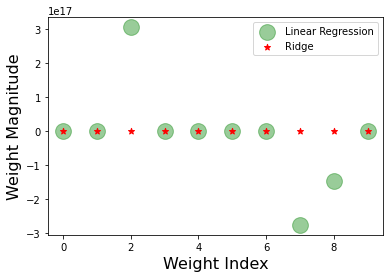

In [39]:
plt.scatter (np.arange(len(lin_regr.coef_[0])),lin_regr.coef_[0],
             alpha=0.4,marker='o', s=250, color='green', label='Linear Regression')
plt.scatter(np.arange(len(rr.coef_[0])),rr.coef_[0],
             marker='*', s=40, color='red',label='Ridge',zorder=7) 
plt.xlabel('Weight Index',fontsize=16)
plt.ylabel('Weight Magnitude',fontsize=16)
plt.legend(loc='upper right')
plt.show()

This does not mean of course that the weights learned by Ridge are close to zero. We can zoom in and plot them separately to see that this is not the case.

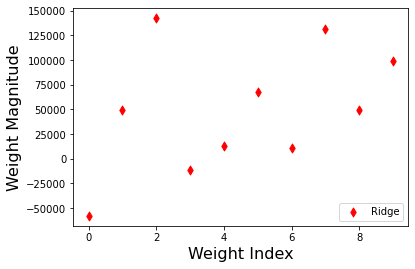

In [40]:
plt.scatter(np.arange(len(rr.coef_[0])),rr.coef_[0],
             marker='d', s=40, color='red',label='Ridge',zorder=7) 
plt.xlabel('Weight Index',fontsize=16)
plt.ylabel('Weight Magnitude',fontsize=16)
plt.legend(loc='lower right')
plt.show()

### 1.3. Lasso regularization

With Lasso we try to minimize the following objective function:

$$Lasso = SSR + \alpha(\Sigma_{i=1}^{n}{|w_i|})$$

Lasso regularization also tries to penalize high weights, but the penalty is lower: the sum of weights is minimized instead of sum of squared weights. Lasso has one very desirable property: due to linearity of the seond term, some of the weights will become 0, becasue the intersection of the best contour from gradient descent and the diamond of Lasso constraint tend to happen close to the axes (See Figure 1 Left for an example). Thus Lasso can also be used for feature selection.

For a not-so-clear reason Lasso regularization takes a significant amount of time. I tried a smaller number of iterations, but in this case the objective function does not reach the desired minimum.

In [12]:
lasso = linear_model.Lasso(alpha=1, max_iter=10e5) # takes about 4 min
lasso.fit(X_train,Y_train)

Lasso(alpha=1, max_iter=1000000.0)

In [13]:
lasso_train_score=lasso.score(X_train,Y_train)
lasso_test_score=lasso.score(X_test,Y_test)
lasso_coeff_used = np.sum(lasso.coef_!=0)
print ("Lasso scores", "train", lasso_train_score, "test", lasso_test_score, 
       "difference:", lasso_train_score - lasso_test_score)
print ("number of features used: ", lasso_coeff_used)

Lasso scores train 0.5939303823029551 test 0.5647254193490225 difference: 0.0292049629539326
number of features used:  9


Note that the number of features dropped from 10 to 9, because one of the features was assigned weight 0. Though the overall quality of the model is reduced, the difference between the train and test scores became smaller.

In [14]:
print("ridge weights:", rr.coef_)
print("lasso weights:", lasso.coef_)

ridge weights: [[-57923.16795046  49652.18617459 142443.99479043 -11765.64475946
   12571.94792913  67877.36967325  10708.89984447 131769.45784849
   49052.22640247  99562.06874908]]
lasso weights: [-57935.66542629  49651.93958247 244250.87009185 -11768.18983147
  12567.34346738  67878.85208817  10706.54372976  40000.16771053
      0.          99574.00486953]


Feature number 8 (sqtfoot_basement) was dropped.

Let's visualize weights of Ridge and Lasso on the same plot.

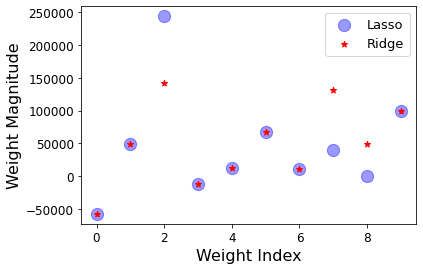

In [18]:
plt.scatter(np.arange(len(lasso.coef_)),lasso.coef_,
            alpha=0.4, marker='o', s=150, color='blue',label='Lasso') 
plt.scatter(np.arange(len(rr.coef_[0])),rr.coef_[0],
             marker='*', s=50, color='red',label='Ridge',zorder=7) 
plt.xlabel('Weight Index',fontsize=16)
plt.ylabel('Weight Magnitude',fontsize=16)
plt.legend(loc='upper right')
plt.show()

It does seem that Lasso is much less efficient in keeping the weight under control.

### 1.4. Elastic Net

Elastic net is a combination of Ridge and Lasso constraints. It tries to minimize the following objective function:

$$ElasticNet = SSR + \alpha(\Sigma_{i=1}^{n}{|w_i|^2}) + \beta(\Sigma_{i=1}^{n}{|w_i|})$$

We can specify how much of each regularization to apply by changing the ratio between $\alpha$ and $\beta$, specifying the proportion of L1 regularization with $l1_ratio$. L1 norm refers to Lasso regularization (the degree of weights is 1), while L2 norm refers to Ridge (the degree of weights is 2).

In [19]:
enet = linear_model.ElasticNet(l1_ratio=0.5, alpha=1, max_iter=10e5)
enet.fit(X_train,Y_train)

enet_train_score=enet.score(X_train,Y_train)
enet_test_score=enet.score(X_test,Y_test)
enet_coeff_used = np.sum(enet.coef_!=0)
print ("Elastic net scores", "train", enet_train_score, "test", enet_test_score, 
       "difference:", enet_train_score - enet_test_score)
print ("number of features used: ", enet_coeff_used)

Elastic net scores train 0.5472391683050393 test 0.5452813990168041 difference: 0.0019577692882352116
number of features used:  10


Note that this model (though too simple still) achieves a perfect degree of generalization: the difference between the train and test scores is very low. 

Let's plot the weights for all three regularizations.

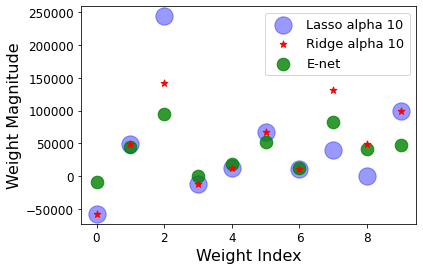

In [20]:
plt.scatter(np.arange(len(lasso.coef_)),lasso.coef_,
             alpha=0.4, marker='o', s=300, color='blue',label='Lasso alpha 10') 
plt.scatter(np.arange(len(rr.coef_[0])),rr.coef_[0],
             marker='*', s=50, color='red',label='Ridge alpha 10',zorder=7) 
plt.scatter(np.arange(len(enet.coef_)),enet.coef_,
            alpha=0.6, marker='h', s=160, color='green',label='E-net',zorder=5) 
plt.xlabel('Weight Index',fontsize=16)
plt.ylabel('Weight Magnitude',fontsize=16)
plt.legend(loc='upper right')
plt.show()

Here we see that with Elastic Net all the weights are kept low, and many of them are close to zero.

Here is the list of all the features for your reference.
<ul>  
    <li>[0] bedrooms - no. of bedrooms, numeric.</li>
    <li>[1] bathrooms - no. of bathrooms, numeric.</li>
    <li>[2] sqft_living - square footage of the home, numeric.</li>
    <li>[3] sqft_lot - square footage of the lot, numeric.</li>
    <li>[4] floors - no.of floors, numeric.</li>
    <li>[5] waterfront - has a view to a waterfront, numeric (0 or 1).</li>
    <li>[6] condition - the amount of wear-and-tear, numeric (from 0 to 5).</li>
    <li>[7] sqft_above - square footage of house apart from basement, numeric.</li>
    <li>[8] sqft_basement - square footage of the basement, numeric.</li>
    <li>[9] age - number of years since year built to year sold, numeric.</li>
</ul>

## 2. Polynomial regression with regularization

From all the experiments above we realize that the Linear regression is probably too simple to model relationships between the features and the target variable in this dataset. We know this because we never achieved a good training score.

We will now try to apply the regularizations to the dataset with added polynomial features. The degree of polynomial is 2.

### 2.1. Pure Polynomial Regression

We repeat the data preprocessing and feature scaling.

In [41]:
data = pd.read_csv(file_name, index_col='id')

Y = data['price'] 
X = data['sqft_living'] 

# convert to numpy vectors (1D vectors in this case)
X=X.values.reshape(-1,1) 
Y=Y.values.reshape(-1,1) 

In [42]:
data = pd.read_csv(file_name, index_col='id')

Y = data['price'] 
X = data[['bedrooms','bathrooms', 'sqft_living','sqft_lot',
          'floors', 'waterfront', 'condition', 'sqft_above', 
          'sqft_basement', 'age']] 

# convert to numpy vectors 
X=X.values.reshape(len(X),len(X.columns)) 
Y=Y.values.reshape(len(Y),1) 

# normalize X
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

We add polynomial features and split the data into training and test set.

In [43]:
# Add polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)
X = transformer.transform(X)

# Split the data into training/testing sets 
split_n = len(X)//3 
X_train = X[:-split_n] 
X_test = X[-split_n:] 
   
# Split the targets into training/testing sets 
Y_train = Y[:-split_n] 
Y_test = Y[-split_n:] 

The modified input array contains additional columns: one with the original feature, the other with its square plus the products by all the features in other columns.

The model learning algorithm does not change:

In [44]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

r_sq_test = regr.score(X_test,Y_test)
r_sq_train = regr.score(X_train,Y_train)
print("Polynomial Regression - score", "train:", r_sq_train, "test:", r_sq_test, 
      "difference:", r_sq_train - r_sq_test)

Polynomial Regression - score train: 0.6640072157038772 test: 0.5977472106941717 difference: 0.06626000500970552


### 2.2. Polynomial Regression with Ridge

In [45]:
# the higher the alpha value, the more restrictions on the coefficients
rr = linear_model.Ridge(alpha=1) 
rr.fit(X_train, Y_train)

ridge_train_score = rr.score(X_train,Y_train)
ridge_test_score = rr.score(X_test, Y_test)

print("Ridge coefficient of determination", "train:", ridge_train_score, "test:", ridge_test_score, 
      "difference:", ridge_train_score - ridge_test_score)

Ridge coefficient of determination train: 0.665606836043564 test: 0.6011453523905405 difference: 0.06446148365302351


### 3.2. Lasso regularization

With all 65 features this takes about 5 hours. Do not re-run it.

In [28]:
lasso = linear_model.Lasso(alpha=2, max_iter=10e5) # takes about 5 hours
lasso.fit(X_train,Y_train)

Lasso(alpha=2, max_iter=1000000.0)

In [29]:
lasso_train_score=lasso.score(X_train,Y_train)
lasso_test_score=lasso.score(X_test,Y_test)
lasso_coeff_used = np.sum(lasso.coef_!=0)
print ("Lasso scores", "train:", lasso_train_score, "test:", lasso_test_score, 
       "difference:", lasso_train_score - lasso_test_score )
print ("number of features used: ", lasso_coeff_used)

Lasso scores train: 0.6656068376673235 test: 0.6011372343791805 difference: 0.064469603288143
number of features used:  53


Note that 8 features were now dropped - their weights are zero.

### 3.3. Elastic Net

In [30]:
enet = linear_model.ElasticNet(l1_ratio=0.5, alpha=2, max_iter=10e5)
enet.fit(X_train,Y_train)

enet_train_score=enet.score(X_train,Y_train)
enet_test_score=enet.score(X_test,Y_test)
enet_coeff_used = np.sum(enet.coef_!=0)
print ("Elastic net scores", "train:", enet_train_score, "test:", enet_test_score, 
       "difference:", enet_train_score - enet_test_score )
print ("number of features used: ", enet_coeff_used)

Elastic net scores train: 0.6027831862943643 test: 0.5415219362993731 difference: 0.061261249994991274
number of features used:  65


#### Conclusion

We obtained the best results using Polynomial Regression with Ridge regularization. 

Now let's try to classify our two houses.

In [31]:
x = [[2,1,830,9000,1,0,3,830,0,75], [6,6,7390,24829,2,1,4,5000,2390,24]]
y = [85000, 5300000]

x, y = np.array(x), np.array(y)

# normalizing - to be consistent with the model
# scaler remembers all necessary statistics 
x = scaler.transform(x)

In [32]:
# adding poly features
transformer.fit(x)
x_ = transformer.transform(x)

y_pred = rr.predict(x_)
print('predicted price:', y_pred)
print('actual price', y)

predicted price: [[ 283926.03235311]
 [4731132.72794121]]
actual price [  85000 5300000]


This is the best we can do at this point.

Copyright &copy; 2022 Marina Barsky. All rights reserved.